In [123]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [124]:
import warnings
warnings.filterwarnings("ignore")

import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [125]:
data=pd.read_csv(r'd:\Bharat-intern\TSLA-stocks2010-2020.csv')

In [126]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [127]:
def check_data(dataframe,head=5):
    print(dataframe.shape)
    print(dataframe.head(head))
    print(dataframe.dtypes)
    print(dataframe.tail())
    print(dataframe.isnull().sum())

check_data(data)
numeric_cols = data.select_dtypes(include='number')
if not numeric_cols.empty:
        print("\nQuantile statistics for numeric columns:")
        print(numeric_cols.quantile([0, 0.5, 0.95, 0.99, 1]).T)
else:
        print("\nNo numeric columns to calculate quantiles.")

# Assuming `data` is your dataframe
check_data(data)




(2416, 7)
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.5

In [128]:
data['Date']=pd.to_datetime(data['Date'])

In [129]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Preparing data

In [130]:
tesla_data=data[['Date','Close']]

In [131]:
tesla_data

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [132]:
tesla_data.index=tesla_data['Date']

In [133]:
tesla_data


,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [134]:
tesla_data.drop('Date',axis=1,inplace=True)

In [135]:
tesla_data.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [136]:
result_data=tesla_data.copy()

In [137]:
result_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


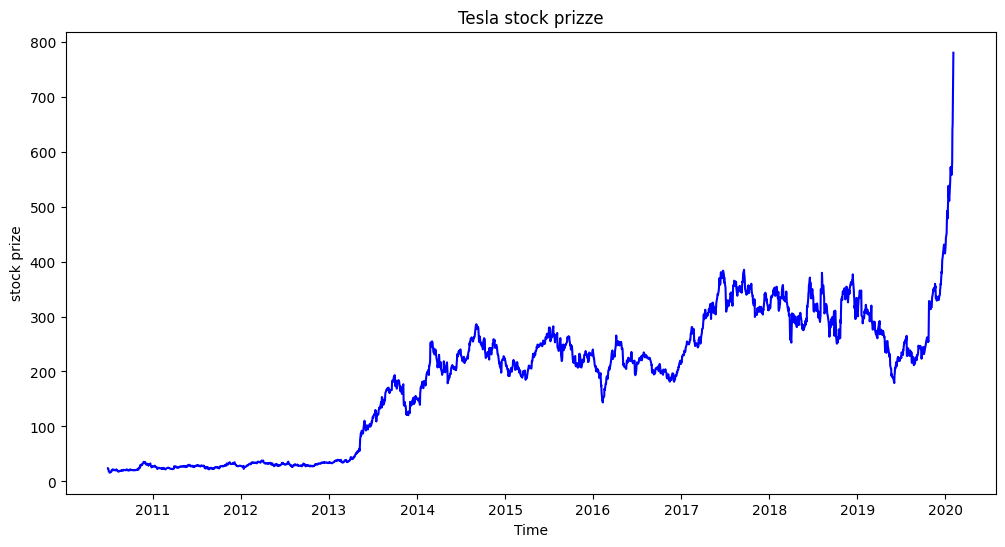

In [138]:
plt.figure(figsize=(12,6))
plt.plot(result_data['Close'],color='blue')
plt.title("Tesla stock prizze")
plt.xlabel("Time")
plt.ylabel('stock prize')
plt.show()

So the first conclusion is about the boom of tesla stock price in late 2019 and yes it has no effect of corona virus

conversion of data to 

In [139]:
tesla_data=tesla_data.values
 #it returns the values in the dataset and return it to the array type and also removes the axis

In [140]:
tesla_data

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [640.809998],
       [650.570007],
       [780.      ]])

In [141]:
tesla_data=tesla_data.astype("float32")
#It is necessary to define float 32 for neural network

In [142]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [143]:
train,test,pos=split_data(tesla_data,0.20)


In [144]:
print(train.shape,test.shape)

(1933, 1) (483, 1)


In [145]:
scaler_train=MinMaxScaler(feature_range=(0,1))


In [146]:
train=scaler_train.fit_transform(train)#minmax the train variable , or simply changes the values into a range of max and min value



In [147]:
scaler_test=MinMaxScaler(feature_range=(0,1))

test=scaler_test.fit_transform(test)
#doing the same thing with test set also

In [148]:
train[0:5]


array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [149]:
test[0:5]


array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [150]:
def create_features(data,lookback):
    X,Y=[],[]
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
    return np.array(X),np.array(Y)

In [151]:
lookback=20


In [152]:
X_train,y_train=create_features(train,lookback)#splitting differently through same funcitons for both testing and training sets
X_test,y_test=create_features(test,lookback)


In [153]:
#checking the shapes for every set
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(1913, 20) (1913,) (463, 20) (463,)


In [154]:
X_train[0:5]


array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

In [155]:
y_train[0:5]

array([0.01332611, 0.01232395, 0.01121344, 0.01386782, 0.01665764],
      dtype=float32)

In [156]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))


In [157]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))


In [158]:
y_train=y_train.reshape(-1,1)


In [159]:
y_test=y_test.reshape(-1,1)


In [160]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


NOW creating our model of LSTM (LONG SHORT TERM MEMORY)

In [161]:
model=Sequential()
model.add(LSTM(units=50,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [162]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
model.compile(loss="mean_squared_error",optimizer="adam")


In [166]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath=r"d:\Bharat-intern.keras",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

In [167]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/100
87/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039  
Epoch 1: val_loss improved from inf to 0.00754, saving model to d:\Bharat-intern.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0043 - val_loss: 0.0075
Epoch 2/100
90/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 2: val_loss improved from 0.00754 to 0.00656, saving model to d:\Bharat-intern.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - val_loss: 0.0066
Epoch 3/100
88/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033
Epoch 3: val_loss improved from 0.00656 to 0.00554, saving model to d:\Bharat-intern.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 4/100
88/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 4: val_loss did not improve from 0.00554
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - val_loss: 0.0060
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020  
Epoch 5: val_loss did not improve from 0.00554
96/96 ━━━━

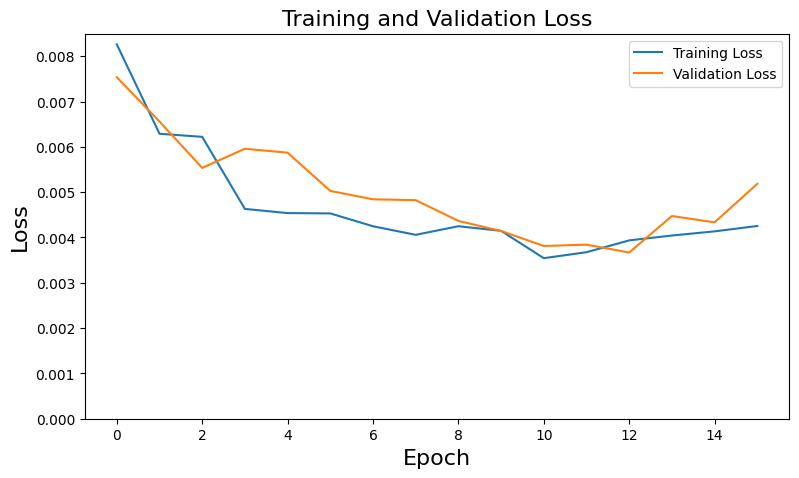

In [168]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")     #history is the object in the keras which is used to save the entire data model
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()


NOW LETS SEE  SOME EVALUATION

In [169]:
loss=model.evaluate(X_test,y_test,batch_size=20 )

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 


In [171]:
print("\nTest loss:%.1f%%"%(100.0*loss))



Test loss:0.5%


NOW PREDICTION TIME

In [172]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [173]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [174]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

RMSE value to train dataset

In [175]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))


In [176]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict,))


In [178]:
print(f"Train RMSE:{train_rmse}")
print(f"Test RMSE:{test_rmse}")

Train RMSE:18.473194122314453
Test RMSE:38.95874786376953


The mistake that tesla will be made in the next period is 32 dollars)¶

In [179]:
train_prediction_data=result_data[lookback:pos]


In [180]:
train_prediction_data["Predicted"]=train_predict


In [181]:
train_prediction_data.head()


,Close,Predicted
Date,,
2010-07-28,20.719999,36.833374
2010-07-29,20.350000,36.872963
2010-07-30,19.940001,36.897747
2010-08-02,20.920000,36.933655
2010-08-03,21.950001,36.906242


In [182]:
test_prediction_data=result_data[pos+lookback:]


In [183]:
test_prediction_data["Predicted"]=test_predict


In [184]:
test_prediction_data.head()


,Close,Predicted
Date,,
2018-04-03,267.529999,332.416412
2018-04-04,286.940002,327.522522
2018-04-05,305.720001,327.514343
2018-04-06,299.299988,328.724213
2018-04-09,289.660004,327.163757


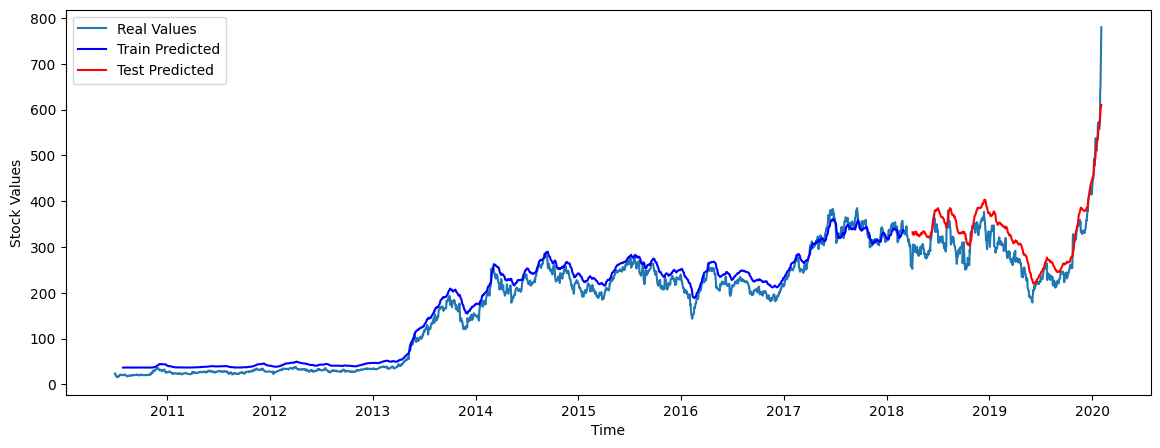

In [185]:
plt.figure(figsize=(14,5))
plt.plot(result_data,label="Real Values")
plt.plot(train_prediction_data["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_data["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()

If we forecast in a certain period, we will conclude that we forecast 32 below or 32 above